In [1]:
import pandas as pd
import seaborn as sns

dataset = pd.read_csv("../clean_data/corr_matrix_dataset")

In [2]:
from models import *

### LR Model

In [60]:
from sklearn.linear_model import LogisticRegression

### KNN Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

best_f1 = 0
p_range = [1,2]
k_range = range(2,15)
for p in p_range:
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k,p=p)
        train, test = cross_validate(model,dataset)
        if test[1]['f1_score'][0].mean() > best_f1 and train[1]['f1_score'][0].mean() < 0.95:
            best_f1 = test[1]['f1_score'][0].mean()
            best_knn = model.get_params()
            train_knn = train
            test_knn = test

In [47]:
def best_metrics(params,train,test):
    print("Best model parameters")
    print(params)
    print()
    print("================Train================")
    print(f"Training accuracy = {np.array(train[0]).mean():.3f} +- {np.array(train[0]).std():.3f}")
    print(f'Avg F1 score = {train[1]["f1_score"][0].mean():.3f} +- {train[1]["f1_score"][1].mean():.3f}')
    print()
    print("================Test================")
    print(f"Test accuracy = {np.array(test[0]).mean():.3f} +- {np.array(test[0]).std():.3f}")
    print(f'Avg F1 score = {test[1]["f1_score"][0].mean():.3f} +- {test[1]["f1_score"][1].mean():.3f}')
    
best_metrics(best_knn,train_knn,test_knn)

Best model parameters
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

================Train================
Training accuracy = 0.870 +- 0.019
Avg F1 score = 0.870 +- 0.043

================Test================
Test accuracy = 0.796 +- 0.036
Avg F1 score = 0.794 +- 0.089


### RF Model

### SVM Model

In [55]:
from sklearn.svm import SVC

best_f1 = 0
kernel = ['rbf','linear','sigmoid']
C = [0.001,0.01,0.1,1,10]
for k in kernel:
    for c in C:
        model = SVC(kernel='linear',C=c,probability=True)
        train, test = cross_validate(model,dataset)
        if test[1]['f1_score'][0].mean() > best_f1 and np.array(train[0]).mean()< 0.95:
            best_f1 = test[1]['f1_score'][0].mean()
            best_svm = model.get_params()
            train_svm = train
            test_svm = test

In [56]:
best_metrics(best_svm,train_svm,test_svm)

Best model parameters
{'C': 0.001, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

================Train================
Training accuracy = 0.778 +- 0.029
Avg F1 score = 0.776 +- 0.063

================Test================
Test accuracy = 0.660 +- 0.069
Avg F1 score = 0.650 +- 0.138


In [59]:
model.coef_[0]

array([ 0.01894702, -0.1092098 , -0.09089343, -0.02091205, -0.02448366,
        0.05970467, -0.07067791,  0.08981477,  0.1341876 , -0.10769784,
       -0.0090548 , -0.01648479, -0.04766782, -0.01098608, -0.06191127,
        0.07019342,  0.01659954,  0.05195361, -0.12458674,  0.00673782,
        0.0132093 ,  0.03765778,  0.03648516, -0.02167907,  0.00924844,
       -0.10801983,  0.10264395,  0.00904938, -0.12144118,  0.14807558,
       -0.05097391, -0.16342187, -0.00605796,  0.07327523,  0.04221449,
       -0.01578837,  0.08902348,  0.00508317, -0.02034005, -0.07975273,
       -0.04999058,  0.0344853 ,  0.01998061, -0.01192037,  0.02784519,
        0.05575092,  0.01422737, -0.06499373, -0.0762956 ,  0.0190219 ,
       -0.04838446, -0.01010485, -0.01084956, -0.04691351,  0.06479269,
        0.03992315, -0.0205845 ,  0.04422161, -0.0364202 ,  0.0182124 ,
       -0.04694466, -0.04547281, -0.03949045,  0.07648897, -0.13736341,
        0.03951419,  0.07632835,  0.07274864, -0.00477649, -0.15

In [50]:
model = SVC(kernel='sigmoid',C=1)
feat_imp = model.feature_importances_
features = model.feature_names_in_

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [51]:
from sklearn.linear_model import LogisticRegression

C = [0.001,0.01,0.1,1,10]
best_f1 = 0
for c in C:
    model = LogisticRegression(C=c,max_iter=1000)
    train, test = cross_validate(model,dataset)
    if test[1]['f1_score'][0].mean() > best_f1 and np.array(train[0]).mean() < 0.95:
        best_f1 = test[1]['f1_score'][0].mean()
        best_params = model.get_params()
        train_saved = train
        test_saved = test

In [54]:
model.coef_

array([[ 5.67580008e-01, -3.21230649e-01, -2.25378665e-01,
         6.70985609e-01,  2.26022697e-01,  5.07709208e-01,
        -8.03136585e-03,  4.31942810e-01, -8.73108590e-01,
         4.08268758e-01, -2.51176028e-01,  3.68198444e-01,
         6.28514709e-02, -8.06637807e-01, -2.89562949e-01,
        -7.41614677e-01,  4.30992092e-01, -1.27470698e-01,
        -1.76125333e-01,  1.15826382e-01, -4.73092696e-02,
         5.63637785e-01,  6.59188025e-01,  3.74081589e-01,
        -3.29514119e-01, -2.61564223e-01,  8.26367182e-02,
        -5.64762698e-01, -5.59120589e-01,  5.19304769e-01,
         1.67529173e-01, -3.94544193e-01,  9.61806672e-02,
        -1.55076509e-02,  4.87883662e-01, -4.59191003e-01,
         3.66530735e-01,  2.56084719e-01, -1.94998857e-01,
        -5.53952119e-01,  9.13817204e-02,  1.63128846e-01,
        -5.61890045e-01, -1.76335887e-01, -2.66838979e-02,
         7.32211362e-01,  7.56775634e-02,  2.16032354e-01,
        -3.73824163e-01, -1.33282331e-01, -1.32542152e-0

In [41]:
best_metrics(best_params,train_saved,test_saved)

Best model parameters
{'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

================Train================
Training accuracy = 0.930 +- 0.014
Avg F1 score = 0.930 +- 0.023

================Test================
Test accuracy = 0.775 +- 0.059
Avg F1 score = 0.770 +- 0.124


In [42]:
model.coef_

array([[ 5.67580008e-01, -3.21230649e-01, -2.25378665e-01,
         6.70985609e-01,  2.26022697e-01,  5.07709208e-01,
        -8.03136585e-03,  4.31942810e-01, -8.73108590e-01,
         4.08268758e-01, -2.51176028e-01,  3.68198444e-01,
         6.28514709e-02, -8.06637807e-01, -2.89562949e-01,
        -7.41614677e-01,  4.30992092e-01, -1.27470698e-01,
        -1.76125333e-01,  1.15826382e-01, -4.73092696e-02,
         5.63637785e-01,  6.59188025e-01,  3.74081589e-01,
        -3.29514119e-01, -2.61564223e-01,  8.26367182e-02,
        -5.64762698e-01, -5.59120589e-01,  5.19304769e-01,
         1.67529173e-01, -3.94544193e-01,  9.61806672e-02,
        -1.55076509e-02,  4.87883662e-01, -4.59191003e-01,
         3.66530735e-01,  2.56084719e-01, -1.94998857e-01,
        -5.53952119e-01,  9.13817204e-02,  1.63128846e-01,
        -5.61890045e-01, -1.76335887e-01, -2.66838979e-02,
         7.32211362e-01,  7.56775634e-02,  2.16032354e-01,
        -3.73824163e-01, -1.33282331e-01, -1.32542152e-0

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

best_f1 = 0
learning_rate = [0.001,0.01,0.1,1]
for lr in learning_rate:        
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(),learning_rate=lr,)
    train, test = cross_validate(model,dataset)
    if test[1]['f1_score'][0].mean() > best_f1:
        best_f1 = test[1]['f1_score'][0].mean()
        best_params = model.get_params()
        train_saved = train
        test_saved = test

In [18]:
train_saved[1]['f1_score'][0].mean()

1.0

In [1]:
import pandas as pd
import os
import librosa
from pyaudio_features import *

wavs, labels = data_import('..\\raw_data')

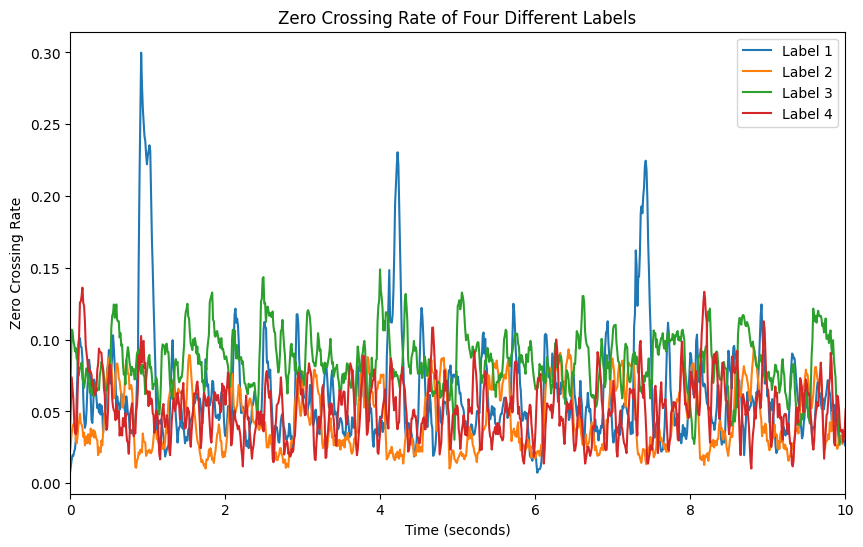

In [4]:
band_0 = wavs[0]
band_1 = wavs[52]
band_2 = wavs[101]
band_3 = wavs[151]

import librosa
import matplotlib.pyplot as plt
import numpy as np

# Paths to your WAV files
wav_files = [band_0,band_1,band_2,band_3]
labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4']

# Initialize a matplotlib figure
plt.figure(figsize=(10, 6))

for wav_file, label in zip(wav_files, labels):
    # Load the audio file
    y, sr = librosa.load(wav_file, sr=None)
    
    # Calculate the zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y)[0]
    
    # Generate time axis for plotting
    t = np.linspace(0, len(y) / sr, num=len(zcr))
    
    # Plot the zero crossing rate
    plt.plot(t, zcr, label=label)

# Adding labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Zero Crossing Rate')
plt.title('Zero Crossing Rate of Four Different Labels')
plt.legend()
plt.xlim(0,10)

# Show the plot
plt.show()

In [2]:
from plots import *

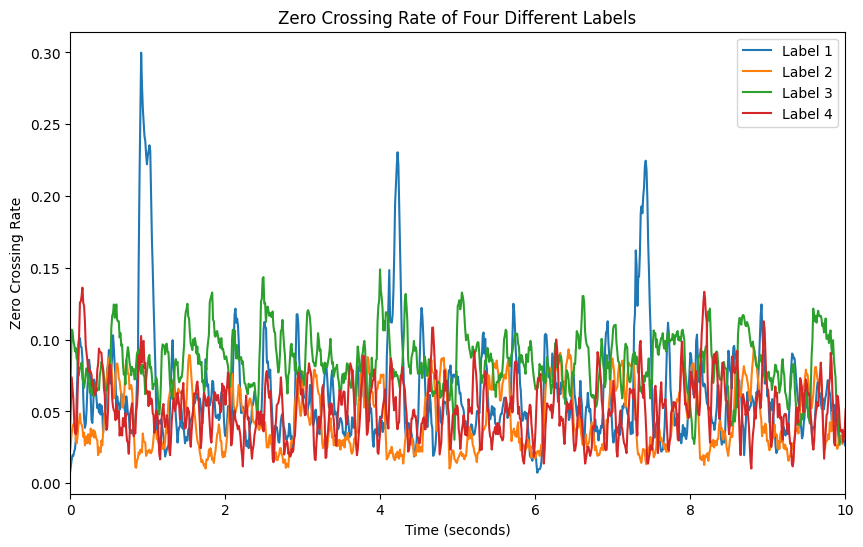

In [4]:
plot_zcr(wav_files,labels)

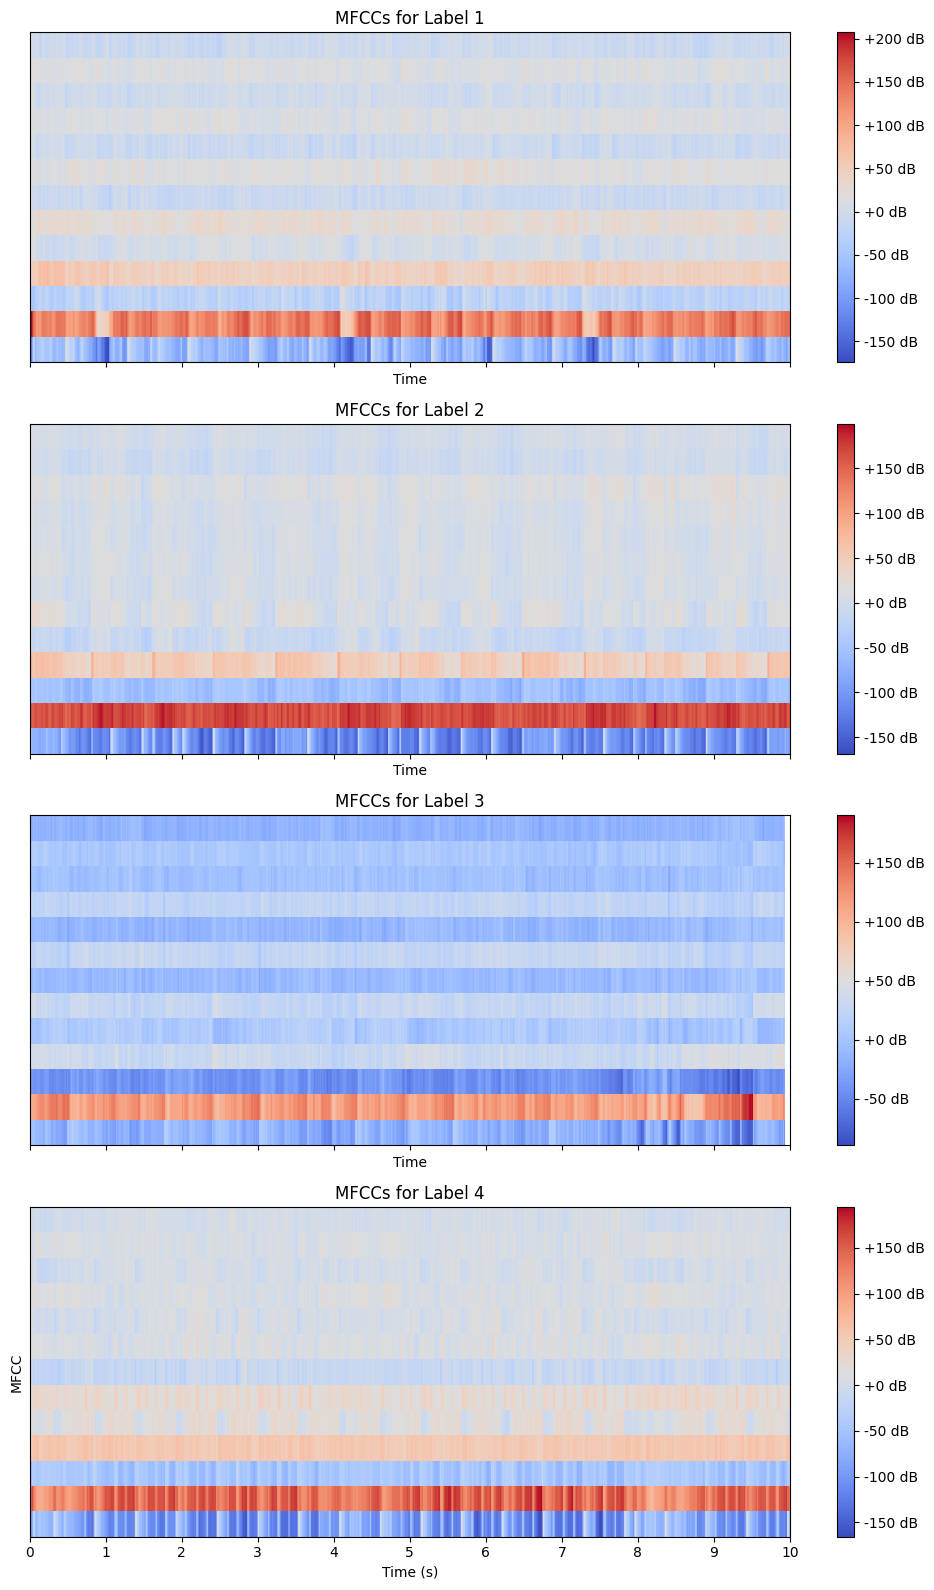

In [5]:
plot_mfcc(wav_files,labels)